In [1]:
# Initial imports
from pathlib import Path
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline


In [2]:
# Loading data
df_heart = pd.read_csv("Resources/cleaned_data_updated.csv")
df_heart.head()

,gender,age,current_smoker,prevalent_stroke,prevalent_hypertension,diabetes,total_cholesterol,systolic_blood_pressure,diastolic_blood_pressure,bmi,heart_rate,heart_stroke
0,Male,39,0,no,0,0,195,106.0,70.0,26.97,80,No
1,Female,46,0,no,0,0,250,121.0,81.0,28.73,95,No
2,Male,48,1,no,0,0,245,127.5,80.0,25.34,75,No
3,Female,61,1,no,1,0,225,150.0,95.0,28.58,65,yes
4,Female,46,1,no,0,0,285,130.0,84.0,23.10,85,No


In [3]:
df_heart.dtypes

gender                       object
age                           int64
current_smoker                int64
prevalent_stroke             object
prevalent_hypertension        int64
diabetes                      int64
total_cholesterol             int64
systolic_blood_pressure     float64
diastolic_blood_pressure    float64
bmi                         float64
heart_rate                    int64
heart_stroke                 object
dtype: object

In [4]:
heart_stroke_dummies = pd.get_dummies(df_heart["heart_stroke"])
print(heart_stroke_dummies)

       No  yes
0       1    0
1       1    0
2       1    0
3       0    1
4       1    0
...    ..  ...
16671   0    1
16672   1    0
16673   1    0
16674   1    0
16675   1    0

[16676 rows x 2 columns]


In [5]:
df_heart = pd.concat([df_heart, heart_stroke_dummies], axis=1)
df_heart.head()

,gender,age,current_smoker,prevalent_stroke,prevalent_hypertension,diabetes,total_cholesterol,systolic_blood_pressure,diastolic_blood_pressure,bmi,heart_rate,heart_stroke,No,yes
0,Male,39,0,no,0,0,195,106.0,70.0,26.97,80,No,1,0
1,Female,46,0,no,0,0,250,121.0,81.0,28.73,95,No,1,0
2,Male,48,1,no,0,0,245,127.5,80.0,25.34,75,No,1,0
3,Female,61,1,no,1,0,225,150.0,95.0,28.58,65,yes,0,1
4,Female,46,1,no,0,0,285,130.0,84.0,23.10,85,No,1,0


In [6]:
df_heart = df_heart.drop(columns=["heart_stroke", "No"])
df_heart = df_heart.rename(columns={"yes": "heart_stroke"})
df_heart.head()

,gender,age,current_smoker,prevalent_stroke,prevalent_hypertension,diabetes,total_cholesterol,systolic_blood_pressure,diastolic_blood_pressure,bmi,heart_rate,heart_stroke
0,Male,39,0,no,0,0,195,106.0,70.0,26.97,80,0
1,Female,46,0,no,0,0,250,121.0,81.0,28.73,95,0
2,Male,48,1,no,0,0,245,127.5,80.0,25.34,75,0
3,Female,61,1,no,1,0,225,150.0,95.0,28.58,65,1
4,Female,46,1,no,0,0,285,130.0,84.0,23.10,85,0


In [7]:
prevalent_stroke_dummies = pd.get_dummies(df_heart["prevalent_stroke"])
print(prevalent_stroke_dummies)

       no  yes
0       1    0
1       1    0
2       1    0
3       1    0
4       1    0
...    ..  ...
16671   1    0
16672   1    0
16673   1    0
16674   1    0
16675   1    0

[16676 rows x 2 columns]


In [8]:
df_heart = pd.concat([df_heart, prevalent_stroke_dummies], axis=1)
df_heart.head()

,gender,age,current_smoker,prevalent_stroke,prevalent_hypertension,diabetes,total_cholesterol,systolic_blood_pressure,diastolic_blood_pressure,bmi,heart_rate,heart_stroke,no,yes
0,Male,39,0,no,0,0,195,106.0,70.0,26.97,80,0,1,0
1,Female,46,0,no,0,0,250,121.0,81.0,28.73,95,0,1,0
2,Male,48,1,no,0,0,245,127.5,80.0,25.34,75,0,1,0
3,Female,61,1,no,1,0,225,150.0,95.0,28.58,65,1,1,0
4,Female,46,1,no,0,0,285,130.0,84.0,23.10,85,0,1,0


In [9]:
df_heart = df_heart.drop(columns=["prevalent_stroke", "no"])
df_heart = df_heart.rename(columns={"yes": "prevalent_stroke"})
df_heart.head()

,gender,age,current_smoker,prevalent_hypertension,diabetes,total_cholesterol,systolic_blood_pressure,diastolic_blood_pressure,bmi,heart_rate,heart_stroke,prevalent_stroke
0,Male,39,0,0,0,195,106.0,70.0,26.97,80,0,0
1,Female,46,0,0,0,250,121.0,81.0,28.73,95,0,0
2,Male,48,1,0,0,245,127.5,80.0,25.34,75,0,0
3,Female,61,1,1,0,225,150.0,95.0,28.58,65,1,0
4,Female,46,1,0,0,285,130.0,84.0,23.10,85,0,0


In [10]:
gender_dummies = pd.get_dummies(df_heart["gender"])
print(gender_dummies)


       Female  Male
0           0     1
1           1     0
2           0     1
3           1     0
4           1     0
...       ...   ...
16671       0     1
16672       0     1
16673       1     0
16674       1     0
16675       1     0

[16676 rows x 2 columns]


In [11]:
df_heart = pd.concat([df_heart, gender_dummies], axis=1)
df_heart.head()

,gender,age,current_smoker,prevalent_hypertension,diabetes,total_cholesterol,systolic_blood_pressure,diastolic_blood_pressure,bmi,heart_rate,heart_stroke,prevalent_stroke,Female,Male
0,Male,39,0,0,0,195,106.0,70.0,26.97,80,0,0,0,1
1,Female,46,0,0,0,250,121.0,81.0,28.73,95,0,0,1,0
2,Male,48,1,0,0,245,127.5,80.0,25.34,75,0,0,0,1
3,Female,61,1,1,0,225,150.0,95.0,28.58,65,1,0,1,0
4,Female,46,1,0,0,285,130.0,84.0,23.10,85,0,0,1,0


In [12]:
df_heart = df_heart.drop(columns=["gender", "Male"])
df_heart = df_heart.rename(columns={"Female": "gender"})
df_heart.head()


,age,current_smoker,prevalent_hypertension,diabetes,total_cholesterol,systolic_blood_pressure,diastolic_blood_pressure,bmi,heart_rate,heart_stroke,prevalent_stroke,gender
0,39,0,0,0,195,106.0,70.0,26.97,80,0,0,0
1,46,0,0,0,250,121.0,81.0,28.73,95,0,0,1
2,48,1,0,0,245,127.5,80.0,25.34,75,0,0,0
3,61,1,1,0,225,150.0,95.0,28.58,65,1,0,1
4,46,1,0,0,285,130.0,84.0,23.10,85,0,0,1


In [13]:
df_heart.dtypes

age                           int64
current_smoker                int64
prevalent_hypertension        int64
diabetes                      int64
total_cholesterol             int64
systolic_blood_pressure     float64
diastolic_blood_pressure    float64
bmi                         float64
heart_rate                    int64
heart_stroke                  uint8
prevalent_stroke              uint8
gender                        uint8
dtype: object

# RANDOM FOREST

In [14]:
X = df_heart.copy()
X.drop("heart_stroke", axis=1, inplace=True)
X.head()

,age,current_smoker,prevalent_hypertension,diabetes,total_cholesterol,systolic_blood_pressure,diastolic_blood_pressure,bmi,heart_rate,prevalent_stroke,gender
0,39,0,0,0,195,106.0,70.0,26.97,80,0,0
1,46,0,0,0,250,121.0,81.0,28.73,95,0,1
2,48,1,0,0,245,127.5,80.0,25.34,75,0,0
3,61,1,1,0,225,150.0,95.0,28.58,65,0,1
4,46,1,0,0,285,130.0,84.0,23.10,85,0,1


In [15]:
# Define target vector
y = df_heart["heart_stroke"].ravel()
y[:5]

array([0, 0, 0, 1, 0], dtype=uint8)

In [16]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [17]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [18]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [19]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [20]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)

In [21]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [22]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [23]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [24]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,3503,0
Actual 1,4,662


Accuracy Score : 0.9990405372991125
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3503
           1       1.00      0.99      1.00       666

    accuracy                           1.00      4169
   macro avg       1.00      1.00      1.00      4169
weighted avg       1.00      1.00      1.00      4169



In [25]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.17324083510121777, 'bmi'),
 (0.17082384718508106, 'systolic_blood_pressure'),
 (0.1630357712476624, 'total_cholesterol'),
 (0.14946756444603537, 'diastolic_blood_pressure'),
 (0.14239976283093142, 'age'),
 (0.12457662820189463, 'heart_rate'),
 (0.022276797122458225, 'current_smoker'),
 (0.02142750946936682, 'gender'),
 (0.019529244176640453, 'prevalent_hypertension'),
 (0.010006822240543055, 'diabetes'),
 (0.00321521797816895, 'prevalent_stroke')]

<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

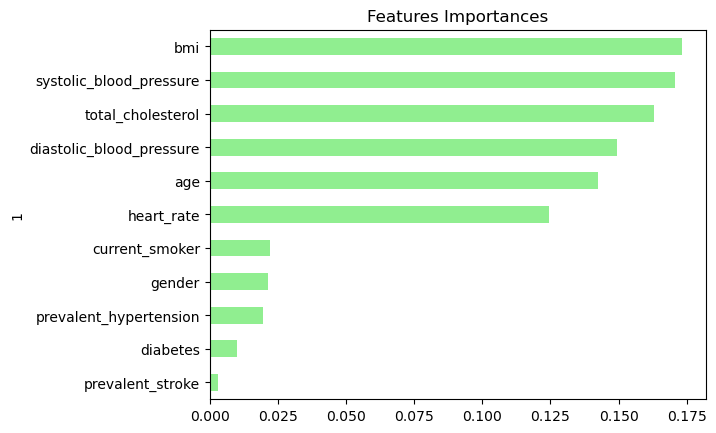

In [26]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)